# Assignment

In [1]:
# Import 

import numpy as np
import matplotlib.pyplot as plt
from degree_freedom_queen import *
from degree_freedom_king1 import *
from degree_freedom_king2 import *
from generate_game import *
from Chess_env import *


size_board = 4

## The Environment

You can find the environment in the file Chess_env, which contains the class Chess_env. To define an object, you need to provide the board size considered as input. In our example, size_board=4. 
Chess_env is composed by the following methods:

1. Initialise_game. The method initialises an episode by placing the three pieces considered (Agent's king and queen, enemy's king) in the chess board. The outputs of the method are described below in order.

     S $\;$ A matrix representing the board locations filled with 4 numbers: 0, no piece in that position; 1, location of the 
     agent's king; 2 location of the queen; 3 location of the enemy king.
     
     X $\;$ The features, that is the input to the neural network. See the assignment for more information regarding the            definition of the features adopted. To personalise this, go into the Features method of the class Chess_env() and change        accordingly.
     
     allowed_a $\;$ The allowed actions that the agent can make. The agent is moving a king, with a total number of 8                possible actions, and a queen, with a total number of $(board_{size}-1)\times 8$ actions. The total number of possible actions correspond      to the sum of the two, but not all actions are allowed in a given position (movements to locations outside the borders or      against chess rules). Thus, the variable allowed_a is a vector that is one (zero) for an action that the agent can (can't)      make. Be careful, apply the policy considered on the actions that are allowed only.
     

2. OneStep. The method performs a one step update of the system. Given as input the action selected by the agent, it updates the chess board by performing that action and the response of the enemy king (which is a random allowed action in the settings considered). The first three outputs are the same as for the Initialise_game method, but the variables are computed for the position reached after the update of the system. The fourth and fifth outputs are:

     R $\;$ The reward. To change this, look at the OneStep method of the class where the rewards are set.
     
     Done $\;$ A variable that is 1 if the episode has ended (checkmate or draw).
     
     
3. Features. Given the chessboard position, the method computes the features.

This information and a quick analysis of the class should be all you need to get going. The other functions that the class exploits are uncommented and constitute an example on how not to write a python code. You can take a look at them if you want, but it is not necessary.






In [2]:
## INITIALISE THE ENVIRONMENT

env=Chess_Env(size_board)

In [3]:
## PRINT 5 STEPS OF AN EPISODE CONSIDERING A RANDOM AGENT

S,X,allowed_a=env.Initialise_game()                       # INTIALISE GAME

print(S)                                                  # PRINT CHESS BOARD (SEE THE DESCRIPTION ABOVE)

print('check? ',env.check)                                # PRINT VARIABLE THAT TELLS IF ENEMY KING IS IN CHECK (1) OR NOT (0)
print('dofk2 ',np.sum(env.dfk2_constrain).astype(int))    # PRINT THE NUMBER OF LOCATIONS THAT THE ENEMY KING CAN MOVE TO


for i in range(5):
    
    a,_=np.where(allowed_a==1)                  # FIND WHAT THE ALLOWED ACTIONS ARE
    a_agent=np.random.permutation(a)[0]         # MAKE A RANDOM ACTION
    print("action",a_agent)
    new_reward = False
    S,X,allowed_a,R,Done=env.OneStep(a_agent,new_reward)   # UPDATE THE ENVIRONMENT
    print("allowed_a",np.shape(allowed_a),allowed_a)
    
    ## PRINT CHESS BOARD AND VARIABLES
    print('')
    print("S",S)
    print(R,'', Done)
    print('check? ',env.check)
    print('dofk2 ',np.sum(env.dfk2_constrain).astype(int))
    
    
    # TERMINATE THE EPISODE IF Done=True (DRAW OR CHECKMATE)
    if Done:
        break



[[3 0 0 0]
 [0 0 0 0]
 [0 2 0 0]
 [0 0 1 0]]
check?  0
dofk2  0
action 7
allowed_a (32, 1) [[1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]

S [[0 0 0 0]
 [3 0 0 0]
 [0 0 0 2]
 [0 0 1 0]]
0  0
check?  0
dofk2  2
action 21
allowed_a (32, 1) [[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]]

S [[0 0 0 0]
 [0 0 2 0]
 [3 0 0 0]
 [0 0 1 0]]
0  0
check?  0
dofk2  0
action 30
allowed_a (32, 1) [[1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]

S [[0 0 0 0]
 [0 0 2 0]
 [0 0 0 1]
 [0 3 0 0]]
0  0
check?  0
dofk2  1
action 18
allowed_a (32, 1) [[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 

In [4]:
# PERFORM N_episodes=1000 EPISODES MAKING RANDOM ACTIONS AND COMPUTE THE AVERAGE REWARD AND NUMBER OF MOVES 

S,X,allowed_a=env.Initialise_game()
N_episodes=1000

# VARIABLES WHERE TO SAVE THE FINAL REWARD IN AN EPISODE AND THE NUMBER OF MOVES 
R_save_random = np.zeros([N_episodes, 1])
N_moves_save_random = np.zeros([N_episodes, 1])

for n in range(N_episodes):
    
    S,X,allowed_a=env.Initialise_game()     # INITIALISE GAME
    Done=0                                  # SET Done=0 AT THE BEGINNING
    i=1                                     # COUNTER FOR THE NUMBER OF ACTIONS (MOVES) IN AN EPISODE
    
    # UNTIL THE EPISODE IS NOT OVER...(Done=0)
    while Done==0:
        
        # SAME AS THE CELL BEFORE, BUT SAVING THE RESULTS WHEN THE EPISODE TERMINATES 
        
        a,_=np.where(allowed_a==1)
        a_agent=np.random.permutation(a)[0]
        new_reward = False
        S,X,allowed_a,R,Done=env.OneStep(a_agent,new_reward)
        print("R",R)
        
        
        if Done:
            
            R_save_random[n]=np.copy(R)
            N_moves_save_random[n]=np.copy(i)

            break

        i=i+1                               # UPDATE THE COUNTER



# AS YOU SEE, THE PERFORMANCE OF A RANDOM AGENT ARE NOT GREAT, SINCE THE MAJORITY OF THE POSITIONS END WITH A DRAW 
# (THE ENEMY KING IS NOT IN CHECK AND CAN'T MOVE)

print('Random_Agent, Average reward:',np.mean(R_save_random),'Number of steps: ',np.mean(N_moves_save_random))



R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0.0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 1
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0.0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0.0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0.0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0.0
R 0.0
R 1
R 0
R 1
R 0
R 0
R 0.0
R 0
R 0
R 1
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0.0
R 0.0
R 1
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 1
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 1
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0


R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 1
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0.0
R 0
R 0
R 0
R 0.0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 1
R 0.0
R 0.0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 1
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0.0
R 0
R 0
R 0.0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0.0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 1
R 1
R 0
R 0
R 0
R 0
R 0
R 1
R 0.0
R 1
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 1
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 1
R 0
R 0.0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 

R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 1
R 0
R 0
R 0
R 0.0
R 0.0
R 0.0
R 0.0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0.0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 1
R 0
R 1
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 1
R 0.0
R 0
R 0
R 0
R 0
R 1
R 0.0
R 0
R 0
R 1
R 0.0
R 0.0
R 0
R 0
R 0
R 1
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 1
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0.0
R 0.0
R 0
R 0
R 0.0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0.0
R 1
R 0
R 0.0
R 1
R 0.0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 

R 0
R 0
R 0
R 0
R 0
R 0
R 1
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 1
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 1
R 0
R 0
R 0.0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 1
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 1
R 0.0
R 0.0
R 1
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 1
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 1
R 0
R 0
R 0
R 0
R 0
R 0
R 1
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0.0
R 0.0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 0.0
R 1
R 0
R 0
R 0
R 0
R 0
R 0.0
R 0
R 0
R 0
R 0
R 0
R 0
R 

Define Adam

In [5]:
## Let's define Adam, see notebook Adam's playgroud for more information

class Adam:

    def __init__(self, Params, beta1):
        
        N_dim=np.shape(np.shape(Params))[0] # It finds out if the parameters given are in a vector (N_dim=1) or a matrix (N_dim=2)
        
        # INITIALISATION OF THE MOMENTUMS
        if N_dim==1:
               
            self.N1=np.shape(Params)[0]
            
            self.mt=np.zeros([self.N1])
            self.vt=np.zeros([self.N1])
        
        if N_dim==2:
            
            self.N1=np.shape(Params)[0]
            self.N2=np.shape(Params)[1]
        
            self.mt=np.zeros([self.N1,self.N2])
            self.vt=np.zeros([self.N1,self.N2])
        
        # HYPERPARAMETERS OF ADAM
        self.beta1=beta1
        self.beta2=0.999
        
        self.epsilon=10**(-8)
        
        # COUNTER OF THE TRAINING PROCESS
        self.counter=0
        
        
    def Compute(self,Grads):
                
        self.counter=self.counter+1
        
        self.mt=self.beta1*self.mt+(1-self.beta1)*Grads
        
        self.vt=self.beta2*self.vt+(1-self.beta2)*Grads**2
        
        mt_n=self.mt/(1-self.beta1**self.counter)
        vt_n=self.vt/(1-self.beta2**self.counter)
        
        New_grads=mt_n/(np.sqrt(vt_n)+self.epsilon)
        
        return New_grads

beta1=0.9 # First order momentum for Adam

## Initialize Adam Params

In [7]:
# INITIALISE THE PARAMETERS OF YOUR NEURAL NETWORK AND...
# PLEASE CONSIDER TO USE A MASK OF ONE FOR THE ACTION MADE AND ZERO OTHERWISE IF YOU ARE NOT USING VANILLA GRADIENT DESCENT...
# WE SUGGEST A NETWORK WITH ONE HIDDEN LAYER WITH SIZE 200. 

import numpy.matlib 
S,X,allowed_a=env.Initialise_game()
N_a=np.shape(allowed_a)[0]   # TOTAL NUMBER OF POSSIBLE ACTIONS
N_in=np.shape(X)[0]    ## INPUT SIZE
N_h=200                ## NUMBER OF HIDDEN NODES

#set random seed
np.random.seed(10)
## INITALISE YOUR NEURAL NETWORK...


# HYPERPARAMETERS SUGGESTED (FOR A GRID SIZE OF 4)

epsilon_0 = 0.2     # STARTING VALUE OF EPSILON FOR THE EPSILON-GREEDY POLICY
beta = 0.00005      # THE PARAMETER SETS HOW QUICKLY THE VALUE OF EPSILON IS DECAYING (SEE epsilon_f BELOW)
gamma = 0.85        # THE DISCOUNT FACTOR
eta = 0.0035        # THE LEARNING RATE

N_episodes = 500 # THE NUMBER OF GAMES TO BE PLAYED 

# SAVING VARIABLES
R_save = np.zeros([N_episodes, 1])
N_moves_save = np.zeros([N_episodes, 1])

#weight initialise
#W1 = np.random.randn(N_in, N_h)/1000
#W2 = np.random.randn(N_h,N_a)/1000

W1 = np.random.uniform(0,1,(N_h, N_in))
W2 = np.random.uniform(0,1,(N_a, N_h))

# The following normalises the random weights so that the sum of each row =1
W1 = np.divide(W1,np.matlib.repmat(np.sum(W1,1)[:,None],1,N_in))
W2 = np.divide(W2,np.matlib.repmat(np.sum(W2,1)[:,None],1,N_h))

bias_W1 = np.zeros((N_h,))
bias_W2 = np.zeros((N_a,))


print("W",W1,W2)
print("bias",np.shape(bias_W1),bias_W1,bias_W2)
x1=np.dot(W1,X)+bias_W1
print("X",np.shape(X),np.shape(x1))
print(np.shape(np.dot(W2,x1)+bias_W2))

W [[0.0263052  0.00070773 0.02161    ... 0.03220316 0.03368208 0.01556186]
 [0.03147359 0.00957684 0.02275864 ... 0.00606496 0.0019231  0.0128701 ]
 [0.0038591  0.00638885 0.03163403 ... 0.03030136 0.02153973 0.02789269]
 ...
 [0.00745545 0.03119801 0.01999057 ... 0.02399051 0.02606457 0.00365012]
 [0.00074568 0.02364644 0.01050774 ... 0.01110022 0.01216128 0.02496483]
 [0.01577329 0.01397078 0.02888768 ... 0.02235599 0.00235686 0.02845395]] [[0.00435651 0.00924724 0.00462405 ... 0.00140784 0.00832301 0.00720998]
 [0.0098536  0.00586077 0.00616222 ... 0.0010806  0.00319171 0.0024448 ]
 [0.00129827 0.00909055 0.00610403 ... 0.00563997 0.00870195 0.00406107]
 ...
 [0.00015967 0.00999858 0.00533841 ... 0.0044824  0.00196832 0.00286865]
 [0.00964089 0.00504781 0.00054623 ... 0.00339875 0.00193406 0.00770252]
 [0.00671708 0.00426894 0.00408619 ... 0.00791993 0.00779112 0.00796532]]
bias (200,) [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 

In [8]:
# Let's create a copy of the parameters to be optimised using Adam
W1_A = np.copy(W1)
W2_A = np.copy(W2)
bias_W1_A = np.copy(bias_W1)
bias_W2_A = np.copy(bias_W2)

# Intialise Adam for the parameters
Adam_W1=Adam(W1_A,beta1)
Adam_W2=Adam(W2_A,beta1)
Adam_bias_W1=Adam(bias_W1_A,beta1)
Adam_bias_W2=Adam(bias_W2_A,beta1)

In [9]:
def EpsilonGreedy_Policy(Qvalues, epsilon, allowed_a):
    
    N_a=np.shape(Qvalues)[0]

    rand_value=np.random.uniform(0,1)

    rand_a=rand_value<epsilon
    a=np.where(allowed_a==1)[0]
    Qvalues_allowed=np.copy(Qvalues[a])
    if rand_a==True:
        
        a_agent=np.random.permutation(a)[0]

    else:
        '''
        sort_a=np.argsort(Qvalues)[::-1]
        while a_item in sort_a:
            if a_item in a:
                return a_item
        '''
        a1=np.argmax(Qvalues_allowed)
        a_agent=np.copy(a[a1])
            
    return a_agent

In [10]:
# TRAINING LOOP BONE STRUCTURE...
# I WROTE FOR YOU A RANDOM AGENT (THE RANDOM AGENT WILL BE SLOWER TO GIVE CHECKMATE THAN AN OPTIMISED ONE, 
# SO DON'T GET CONCERNED BY THE TIME IT TAKES), CHANGE WITH YOURS ...
def SARSA(epsilon_0,beta,gamma,new_reward):
    #env=Chess_Env(size_board)
    S,X,allowed_a=env.Initialise_game()
    N_a=np.shape(allowed_a)[0]   # TOTAL NUMBER OF POSSIBLE ACTIONS
    N_in=np.shape(X)[0]    ## INPUT SIZE
    N_h=200                ## NUMBER OF HIDDEN NODES
    np.random.seed(101)
    
    R_save = np.zeros([N_episodes, 1])
    N_moves_save = np.zeros([N_episodes, 1])
    W1 = np.random.uniform(0,1,(N_h, N_in))
    W2 = np.random.uniform(0,1,(N_a, N_h))

            # The following normalises the random weights so that the sum of each row =1
    W1 = np.divide(W1,np.matlib.repmat(np.sum(W1,1)[:,None],1,N_in))
    W2 = np.divide(W2,np.matlib.repmat(np.sum(W2,1)[:,None],1,N_h))

    bias_W1 = np.zeros((N_h,))
    bias_W2 = np.zeros((N_a,))

    for n in range(N_episodes):

        epsilon_f = epsilon_0 / (1 + beta * n)   ## DECAYING EPSILON
        Done=0                                   ## SET DONE TO ZERO (BEGINNING OF THE EPISODE)
        i = 1                                    ## COUNTER FOR NUMBER OF ACTIONS

        S,X,allowed_a=env.Initialise_game()      ## INITIALISE GAME
        #print("N_episodes",n)                    ## REMOVE THIS OF COURSE, WE USED THIS TO CHECK THAT IT WAS RUNNING


        while Done==0:                           ## START THE EPISODE


            ## THIS IS A RANDOM AGENT, CHANGE IT to SARSA with value function approximation

            #a,_=np.where(allowed_a==1)
            #a_agent=np.random.permutation(a)[0]
            h1 = np.dot(W1,X)+bias_W1

            # Apply the sigmoid function
            x1 = 1/(1+np.exp(-h1))

            Qvalues=np.dot(W2,x1)+bias_W2

            #print("Qvalues",np.shape(Qvalues),Qvalues)

            #S_next,X_next,allowed_a_next,R,Done=env.OneStep(a_agent)

            a_agent = EpsilonGreedy_Policy(Qvalues, epsilon_f, allowed_a)
            S_next,X_next,allowed_a_next,R,Done=env.OneStep(a_agent,new_reward)
            #print("S",S,"action",a_agent,R,Done)

            ## THE EPISODE HAS ENDED, UPDATE...BE CAREFUL, THIS IS THE LAST STEP OF THE EPISODE
            if Done==1:
                #print("Done",Done)
                # Compute the delta
                #delta=R-Qvalues[a]

                # Update the Qvalues
                delta=R-Qvalues[a_agent]



                W2[a_agent,:]=W2[a_agent,:]+eta*delta*x1.T
                bias_W2[a_agent] = bias_W2[a_agent]+eta*delta

                W1=W1+eta*delta*X.T
                bias_W1 = bias_W1+eta*delta
                #b1[a_agent,:]=b1[a_agent,:]+eta*delta*X
                #b2=b2+eta*delta*h1
                #save the R_save,N_moves_save
                R_save[n]=np.copy(R)
                #print(R)
                N_moves_save[n]=np.copy(i)


                break

            # IF THE EPISODE IS NOT OVER...
            h1 = np.dot(W1,X_next)+bias_W1

            # Apply the sigmoid function
            x1 = 1/(1+np.exp(-h1))

            Qvalues2=np.dot(W2,x1)+bias_W2
            a_pri = EpsilonGreedy_Policy(Qvalues2, epsilon_f, allowed_a)

            # Compute the delta
            delta=(R+gamma*Qvalues2[a_pri]-Qvalues[a_agent])*Qvalues2[a_agent]*(1-Qvalues2[a_agent])

            # Update the weights
            #print(np.shape(W2[a_agent,:]),np.shape(delta),np.shape(Qvalues2[a_pri]))
            #print("W2,delta,x",np.shape(W2),np.shape(delta),np.shape(Qvalues2))

            W2[a_agent,:]=W2[a_agent,:]+eta*delta*x1.T
            #print("W2,delta,x",np.shape(W2),np.shape(delta),np.shape(Qvalues2))
            bias_W2[a_agent] = bias_W2[a_agent]+eta*delta

            #W1=W1+eta*delta*X.T
            #bias_W1 = bias_W1+eta*delta
            
            delta1 =  np.dot(W2[a_agent], delta)*x1*(1-x1)
            #print("delta1",np.shape(delta1))
            W1 += eta* np.outer(delta1,X.T)

            bias_W1 += eta*delta1
            
            
            # NEXT STATE AND CO. BECOME ACTUAL STATE...     
            S=np.copy(S_next)
            X=np.copy(X_next)
            allowed_a=np.copy(allowed_a_next)

            i += 1  # UPDATE COUNTER FOR NUMBER OF ACTIONS
            #print("action i",i)

    return R_save,N_moves_save
    
    

In [11]:
def SARSA_Adam(epsilon_0,beta,gamma,new_reward):
    #env=Chess_Env(size_board)
    S,X,allowed_a=env.Initialise_game()
    N_a=np.shape(allowed_a)[0]   # TOTAL NUMBER OF POSSIBLE ACTIONS
    N_in=np.shape(X)[0]    ## INPUT SIZE
    N_h=200                ## NUMBER OF HIDDEN NODES
    np.random.seed(101)
    
    R_save = np.zeros([N_episodes, 1])
    N_moves_save = np.zeros([N_episodes, 1])
    W1 = np.random.uniform(0,1,(N_h, N_in))
    W2 = np.random.uniform(0,1,(N_a, N_h))

            # The following normalises the random weights so that the sum of each row =1
    W1_A = np.divide(W1,np.matlib.repmat(np.sum(W1,1)[:,None],1,N_in))
    W2_A = np.divide(W2,np.matlib.repmat(np.sum(W2,1)[:,None],1,N_h))

    bias_W1_A = np.zeros((N_h,))
    bias_W2_A = np.zeros((N_a,))
    
    # Intialise Adam for the parameters
    Adam_W1=Adam(W1_A,beta1)
    Adam_W2=Adam(W2_A,beta1)
    Adam_bias_W1=Adam(bias_W1_A,beta1)
    Adam_bias_W2=Adam(bias_W2_A,beta1)
    
    

    for n in range(N_episodes):

        epsilon_f = epsilon_0 / (1 + beta * n)   ## DECAYING EPSILON
        Done=0                                   ## SET DONE TO ZERO (BEGINNING OF THE EPISODE)
        i = 1                                    ## COUNTER FOR NUMBER OF ACTIONS

        S,X,allowed_a=env.Initialise_game()      ## INITIALISE GAME
        #print("N_episodes",n)                    ## REMOVE THIS OF COURSE, WE USED THIS TO CHECK THAT IT WAS RUNNING


        while Done==0:                           ## START THE EPISODE
            ## THIS IS A RANDOM AGENT, CHANGE IT to SARSA with value function approximation

            #a,_=np.where(allowed_a==1)
            #a_agent=np.random.permutation(a)[0]
            h1 = np.dot(W1_A,X)+bias_W1_A

            # Apply the sigmoid function
            x1 = 1/(1+np.exp(-h1))

            Qvalues=np.dot(W2_A,x1)+bias_W2_A

            #print("Qvalues",np.shape(Qvalues),Qvalues)

            #S_next,X_next,allowed_a_next,R,Done=env.OneStep(a_agent)

            a_agent = EpsilonGreedy_Policy(Qvalues, epsilon_f, allowed_a)
            S_next,X_next,allowed_a_next,R,Done=env.OneStep(a_agent,new_reward)
            #print("S",S,"action",a_agent,R,Done)

            ## THE EPISODE HAS ENDED, UPDATE...BE CAREFUL, THIS IS THE LAST STEP OF THE EPISODE
            if Done==1:
                #print("Done",Done)
                # Compute the delta
                #delta=R-Qvalues[a]

                # Update the Qvalues
                delta=R-Qvalues[a_agent]

                aa = eta*Adam_W2.Compute(delta)*x1.T

                W2[a_agent,:]=W2_A[a_agent,:]+aa[a_agent]
                bias_W2_A[a_agent] = bias_W2_A[a_agent]+eta*Adam_bias_W2.Compute(delta)[a_agent]

                W1_A=W1_A+eta*Adam_W1.Compute(delta)*X.T
                bias_W1_A = bias_W1_A+eta*Adam_bias_W1.Compute(delta)
                #b1[a_agent,:]=b1[a_agent,:]+eta*delta*X
                #b2=b2+eta*delta*h1
                #save the R_save,N_moves_save
                R_save[n]=np.copy(R)
                #print(R)
                N_moves_save[n]=np.copy(i)


                break

            # IF THE EPISODE IS NOT OVER...
            h1 = np.dot(W1_A,X_next)+bias_W1_A

            # Apply the sigmoid function
            x1 = 1/(1+np.exp(-h1))

            Qvalues2=np.dot(W2_A,x1)+bias_W2_A
            a_pri = EpsilonGreedy_Policy(Qvalues2, epsilon_f, allowed_a)

            # Compute the delta
            delta=(R+gamma*Qvalues2[a_pri]-Qvalues[a_agent])*Qvalues2[a_agent]*(1-Qvalues2[a_agent])

            # Update the weights
            #print(np.shape(W2[a_agent,:]),np.shape(delta),np.shape(Qvalues2[a_pri]))
            #print("W2,delta,x",np.shape(W2),np.shape(delta),np.shape(Qvalues2))
            bb = eta*Adam_W2.Compute(delta)*x1.T
            W2_A[a_agent,:]=W2_A[a_agent,:]+bb[a_agent]
            #print("W2,delta,x",np.shape(W2),np.shape(delta),np.shape(Qvalues2))
            bias_W2_A[a_agent] = bias_W2_A[a_agent]+eta*Adam_bias_W2.Compute(delta)[a_agent]

            #W1=W1+eta*delta*X.T
            #bias_W1 = bias_W1+eta*delta
            
            delta1 =  np.dot(W2_A[a_agent], delta)*x1*(1-x1)
            #print("delta1",np.shape(delta1))
            W1_A += eta * Adam_W1.Compute(np.outer(delta1,X.T))

            bias_W1_A += eta*Adam_bias_W1.Compute(delta1)
            
            
            # NEXT STATE AND CO. BECOME ACTUAL STATE...     
            S=np.copy(S_next)
            X=np.copy(X_next)
            allowed_a=np.copy(allowed_a_next)

            i += 1  # UPDATE COUNTER FOR NUMBER OF ACTIONS
            #print("action i",i)

    return R_save,N_moves_save

In [12]:
N_episodes = 5000
R_save,N_moves_save = SARSA(epsilon_0,beta,gamma,False)
print(np.mean(R_save),np.mean(N_moves_save))

/opt/anaconda3/envs/IRL/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in multiply


0.4962 15.466


In [13]:
N_episodes = 5000
R_save,N_moves_save = SARSA_Adam(epsilon_0,beta,gamma,False)
print(np.mean(R_save),np.mean(N_moves_save))

0.1108 14.9414


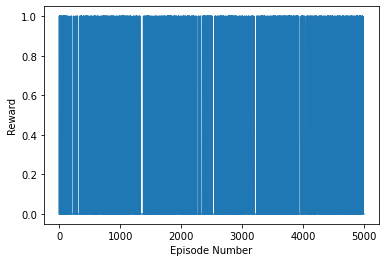

<Figure size 1440x720 with 0 Axes>

In [14]:
plt.figure()
plt.plot(np.arange(1,N_episodes+1,1),R_save)
plt.xlabel('Episode Number')
plt.ylabel('Reward')
plt.figure(figsize=(20, 10))
plt.show()

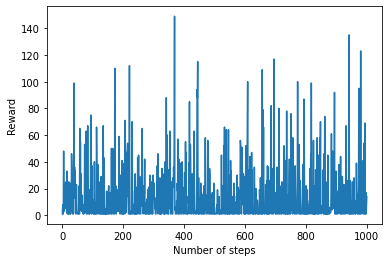

<Figure size 720x468 with 0 Axes>

In [43]:
plt.figure()
plt.plot(np.arange(1,N_episodes+1,1),N_moves_save)
plt.xlabel('Number of steps')
plt.ylabel('Reward')
plt.figure(figsize=(10, 6.5))
plt.show()

In [16]:
epsilon_0_list = [0.05,0.1,0.2]    
beta_list = [0.00001,0.00005,0.0001]     
gamma_list = [0.8,0.85,0.9]
result_list = []
for epsilon_0 in epsilon_0_list:
    for beta in beta_list:
        for gamma in gamma_list:

            R_save,N_moves_save = SARSA(epsilon_0,beta,gamma)
            result_list.append(((epsilon_0,beta,gamma),(np.mean(R_save),np.mean(N_moves_save))))
            print('SARSA_Agent, Average reward:',np.mean(R_save),'\nNumber of steps: ',np.mean(N_moves_save),
                  '\nparameters: epsilon:',epsilon_0,'beta:',beta,'gamma:',gamma)


SARSA_Agent, Average reward: 0.548 
Number of steps:  29.5 
parameters: epsilon: 0.05 beta: 1e-05 gamma: 0.8
SARSA_Agent, Average reward: 0.538 
Number of steps:  29.344 
parameters: epsilon: 0.05 beta: 1e-05 gamma: 0.85
SARSA_Agent, Average reward: 0.496 
Number of steps:  31.078 
parameters: epsilon: 0.05 beta: 1e-05 gamma: 0.9
SARSA_Agent, Average reward: 0.54 
Number of steps:  24.926 
parameters: epsilon: 0.05 beta: 5e-05 gamma: 0.8
SARSA_Agent, Average reward: 0.534 
Number of steps:  28.274 
parameters: epsilon: 0.05 beta: 5e-05 gamma: 0.85
SARSA_Agent, Average reward: 0.502 
Number of steps:  39.62 
parameters: epsilon: 0.05 beta: 5e-05 gamma: 0.9
SARSA_Agent, Average reward: 0.54 
Number of steps:  28.228 
parameters: epsilon: 0.05 beta: 0.0001 gamma: 0.8
SARSA_Agent, Average reward: 0.498 
Number of steps:  31.802 
parameters: epsilon: 0.05 beta: 0.0001 gamma: 0.85
SARSA_Agent, Average reward: 0.612 
Number of steps:  28.178 
parameters: epsilon: 0.05 beta: 0.0001 gamma: 0.9


C:\Users\weizi\AppData\Local\Temp/ipykernel_117144/4175623715.py:105: RuntimeWarning: invalid value encountered in multiply
  delta1 =  np.dot(W2[a_agent], delta)*x1*(1-x1)


SARSA_Agent, Average reward: 0.502 
Number of steps:  24.808 
parameters: epsilon: 0.1 beta: 0.0001 gamma: 0.8
SARSA_Agent, Average reward: 0.538 
Number of steps:  22.488 
parameters: epsilon: 0.1 beta: 0.0001 gamma: 0.85
SARSA_Agent, Average reward: 0.624 
Number of steps:  18.534 
parameters: epsilon: 0.1 beta: 0.0001 gamma: 0.9
SARSA_Agent, Average reward: 0.542 
Number of steps:  13.918 
parameters: epsilon: 0.2 beta: 1e-05 gamma: 0.8
SARSA_Agent, Average reward: 0.578 
Number of steps:  13.306 
parameters: epsilon: 0.2 beta: 1e-05 gamma: 0.85
SARSA_Agent, Average reward: 0.51 
Number of steps:  13.556 
parameters: epsilon: 0.2 beta: 1e-05 gamma: 0.9
SARSA_Agent, Average reward: 0.488 
Number of steps:  14.198 
parameters: epsilon: 0.2 beta: 5e-05 gamma: 0.8
SARSA_Agent, Average reward: 0.55 
Number of steps:  13.156 
parameters: epsilon: 0.2 beta: 5e-05 gamma: 0.85
SARSA_Agent, Average reward: 0.528 
Number of steps:  13.586 
parameters: epsilon: 0.2 beta: 5e-05 gamma: 0.9
SARSA_

In [46]:
print(np.mean(N_moves_save),np.mean(R_save))

14.9414 0.1108
